# MineRL Tutorial

In [1]:
import gym
import minerl
import logging

/Users/mitchman/Desktop/MineBrain/mine-env/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [2]:
logging.basicConfig(level=logging.DEBUG)

In [3]:
minerl.data.download(directory="", experiment='MineRLObtainDiamond-v0')

INFO:minerl.data.download:Downloading experiment MineRLObtainDiamond-v0 to 
INFO:minerl.data.download:Using url "https://router.sneakywines.me/minerl-v1/MineRLObtainDiamond-v0.tar.gz"
INFO:minerl.data.download:Creating a ThreadPool of 1 thread(s).
INFO:minerl.data.download:Fetching download hash ...
INFO:minerl.data.download:Looking for SUMS files...
ERROR:minerl.data.download:URL error encountered when downloading - please try again
ERROR:minerl.data.download:None


In [14]:
#logging.basicConfig(level=logging.DEBUG)

env = gym.make('MineRLNavigateDense-v0')

obs = env.reset()

done = False

while not done:
    action = env.action_space.sample()
    obs, reward, done, _ = env.step(action)

UnregisteredEnv: No registered env with id: MineRLNavigateDense-v0

# Gym Tutorials

In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt

DEBUG:matplotlib:$HOME=/Users/mitchman
DEBUG:matplotlib:CONFIGDIR=/Users/mitchman/.matplotlib
DEBUG:matplotlib:matplotlib data path: /Users/mitchman/Desktop/MineBrain/mine-env/lib/python3.7/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:loaded rc file /Users/mitchman/Desktop/MineBrain/mine-env/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
DEBUG:matplotlib:matplotlib version 3.0.3
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is darwin
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.cp437', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'types', 'importlib', 'importlib._bootstrap',

DEBUG:matplotlib:CACHEDIR=/Users/mitchman/.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /Users/mitchman/.matplotlib/fontlist-v300.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [8]:
env = gym.make('MountainCar-v0')
env.reset()


array([-0.50134868,  0.        ])

In [12]:
print('State space: ', env.observation_space)
print('Action space: ', env.action_space)

State space:  Box(2,)
Action space:  Discrete(3)


In [15]:
print(env.observation_space.low)
print(env.observation_space.high)
print(env.reset())
print(env.step(2))

[-1.2  -0.07]
[0.6  0.07]
[-0.51067597  0.        ]
(array([-0.50977287,  0.0009031 ]), -1.0, False, {})


Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -199.96
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -200.0


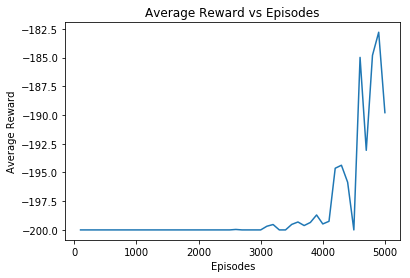

In [3]:
# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()

# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while done != True:   
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
    env.close()
    
    return ave_reward_list

# Run Q-learning algorithm
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 5000)

# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.show()  
  

In [1]:
import gym
import numpy as np

In [3]:
env = gym.make('CartPole-v0')
env.reset()

print(env.observation_space.low)
print(env.observation_space.high)
print(env.reset())

for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action

env.close()

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-0.04373883  0.02115472 -0.0102871  -0.01008824]


/Users/mitchman/Desktop/MineBrain/mine-env/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [2]:
env = gym.make('CartPole-v0')

observation = env.reset()
table = np.zeros((2**len(observation),2))
print(f'Table shape: {table.shape}')

for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        idx = 0
        for i,val in enumerate(observation):
            if val > 0:
                idx += 2**i
                 
        if table[idx][0] > table[idx][1]:
            action = 1
        else:
            action = 0
            
        observation, reward, done, info = env.step(action)
        print(reward)
        table[idx][action] += reward
                 
        if done:
            print(f"Episode finished after {t+1} timesteps")
            break
print(table)
env.close()

Table shape: (16, 2)
Episode finished after 15 timesteps
Episode finished after 25 timesteps
Episode finished after 26 timesteps
Episode finished after 22 timesteps
Episode finished after 31 timesteps
Episode finished after 17 timesteps
Episode finished after 13 timesteps
Episode finished after 16 timesteps
Episode finished after 26 timesteps
Episode finished after 15 timesteps
Episode finished after 23 timesteps
Episode finished after 28 timesteps
Episode finished after 14 timesteps
Episode finished after 15 timesteps
Episode finished after 39 timesteps
Episode finished after 28 timesteps
Episode finished after 45 timesteps
Episode finished after 22 timesteps
Episode finished after 37 timesteps
Episode finished after 19 timesteps
[[ 4.  4.]
 [ 1.  0.]
 [11. 10.]
 [63. 62.]
 [ 1.  0.]
 [ 1.  0.]
 [ 3.  2.]
 [11. 11.]
 [16. 16.]
 [ 6.  5.]
 [ 0.  0.]
 [ 1.  1.]
 [97. 96.]
 [24. 24.]
 [ 1.  1.]
 [ 2.  2.]]


In [3]:
gym.envs.registry